# General informations

In [ ]:
## CHA-AIPH Project
# -*- coding: utf-8 -*-

"""
Created on Tue Jan 4 2021
@author: Tisseaux Antoine

This script is used to create a proper dataframe from the eICU demo database 
available on physionet.org

the final dataframe will be used to predict survival at hospital discharge for
all patients admited in ICU 
"""

'\nCreated on Tue Jan 4 2021\n@author: Tisseaux Antoine\n\nThis script is used to create a proper dataframe from the eICU demo database \navailable on physionet.org\n\nthe final dataframe will be used to predict survival at hospital discharge for\nall patients admited in ICU \n'

# set environement

Importing packages

In [ ]:
# Importing libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

Importing files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



loading csv files

In [ ]:
my_df_sepsis_patients = pd.read_csv('/content/drive/MyDrive/CHAIPH_PROJECT_GR2/project_submission_file_CHA_AIPH_Group1/data/final_dataframes/sepsis_patients_raw_data.csv', sep=",")

setting options for pandas

In [ ]:
# Displaying option: all columns
pd.set_option('display.max_columns', None)

## Missing values:

### missing values visualization

In [ ]:
# displaying percentage of missing values for each variable:
relative_missing_values = my_df_sepsis_patients.isnull().sum()/len(my_df_all_patients)

print("missing values in percent:\n")
print(relative_missing_values)

missing values in percent:

Unnamed: 0           0.000000
intubated            0.000000
vent                 0.000000
dialysis             0.000000
wbc                  0.196767
temperature          0.057836
respiratoryrate      0.007875
heartrate            0.004224
sodium               0.152647
meanbp               0.005893
ph                   0.788527
hematocrit           0.184198
creatinine           0.158331
albumin              0.473533
pao2                 0.788527
pco2                 0.788527
glucose              0.084433
bilirubin            0.520574
glasgow              0.013090
gender               0.000313
age                  0.055385
thrombolytics        0.000000
aids                 0.000000
hepaticfailure       0.000000
lymphoma             0.000000
metastaticcancer     0.000000
leukemia             0.000000
immunosuppression    0.000000
cirrhosis            0.000000
BMI                  0.032490
hospital_death       0.000000
ethnicity            0.010013
dtype: float

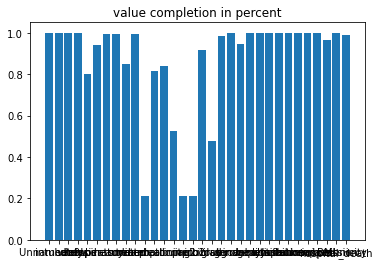

In [ ]:
# plot non-missing values percentage:
relative_recorded_values = 1 - relative_missing_values
plt.bar(relative_recorded_values.index, relative_recorded_values)
plt.title("value completion in percent")
plt.show()

### Dropping rows and columns:

In [ ]:
# dropping 'ethnicity' because not used in prediction model
my_df_sepsis_patients.drop('Unnamed: 0', axis=1, inplace=True)
my_df_sepsis_patients.drop('ethnicity', axis=1, inplace=True)

# dropping NaN values for some variables with small missing values:

my_df_sepsis_patients.dropna(subset=['age', 'glasgow'], inplace=True)

In [ ]:
# dropping all columns with more than 50% of missing values:
variablesToDrop = ['albumin', 'bilirubin', 'pao2', 'pco2', 'ph']

my_df_sepsis_patients.drop(variablesToDrop, axis=1, inplace=True)

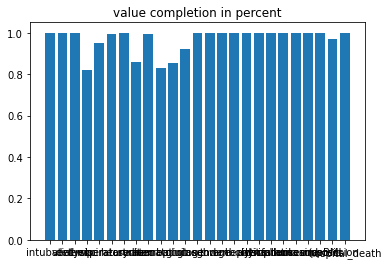

In [ ]:
relative_missing_values = my_df_sepsis_patients.isnull().sum()/len(my_df_all_patients)
relative_recorded_values = 1 - relative_missing_values
plt.bar(relative_recorded_values.index, relative_recorded_values)
plt.title("value completion in percent")
plt.show()

### Inputting values with K-nearest neighbours method:

#### scalling data:

In [ ]:
# scaling values to use KNN imputation:
scaler = MinMaxScaler()
my_df_sepsis_patients = pd.DataFrame(scaler.fit_transform(my_df_sepsis_patients), columns=my_df_sepsis_patients.columns)

In [ ]:
# verifying scaling:
print("descriptive statistics: \n") 
my_df_sepsis_patients.describe()

descriptive statistics: 



,intubated,vent,dialysis,wbc,temperature,respiratoryrate,heartrate,sodium,meanbp,hematocrit,creatinine,glucose,glasgow,gender,age,thrombolytics,aids,hepaticfailure,lymphoma,metastaticcancer,leukemia,immunosuppression,cirrhosis,BMI,hospital_death
count,19175.000000,19175.000000,19175.000000,15716.000000,18207.000000,19055.000000,19126.000000,16503.000000,19095.000000,15937.000000,16401.000000,17716.000000,19175.000000,19170.000000,19175.000000,19175.000000,19175.000000,19175.000000,19175.000000,19175.000000,19175.000000,19175.000000,19175.000000,18598.000000,19175.000000
mean,0.148892,0.263885,0.052621,0.082890,0.757997,0.457607,0.456335,0.438676,0.223684,0.439714,0.077852,0.089734,0.805159,0.487741,0.678525,0.000156,0.003025,0.021121,0.009804,0.036037,0.015802,0.059661,0.028631,0.315404,0.156089
std,0.355991,0.440749,0.223281,0.061105,0.055015,0.257187,0.145497,0.078990,0.259234,0.111873,0.078464,0.059294,0.283013,0.499863,0.207083,0.012507,0.054916,0.143792,0.098533,0.186386,0.124711,0.236864,0.166772,0.145588,0.362949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.044610,0.739726,0.214286,0.390000,0.390244,0.043750,0.361552,0.029449,0.050336,0.666667,0.000000,0.552632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.214531,0.000000
50%,0.000000,0.000000,0.000000,0.072390,0.753425,0.482143,0.465000,0.439024,0.106250,0.435626,0.050905,0.072148,0.916667,0.000000,0.710526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.287151,0.000000
75%,0.000000,1.000000,0.000000,0.105997,0.771689,0.625000,0.545000,0.475610,0.418750,0.513228,0.094657,0.113535,1.000000,1.000000,0.842105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.384925,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### inputting:

In [ ]:
# inputting missing values with K-nearest neighbour method:
imputer = KNNImputer(n_neighbors=5)

my_df_sepsis_patients = pd.DataFrame(imputer.fit_transform(my_df_sepsis_patients), columns=my_df_sepsis_patients.columns)

#### verifying inputation :

In [ ]:
relative_missing_values = my_df_sepsis_patients.isnull().sum()/len(my_df_all_patients)
print("\n\nmissing values in percent:")
print(relative_missing_values)



missing values in percent:
intubated            0.0
vent                 0.0
dialysis             0.0
wbc                  0.0
temperature          0.0
respiratoryrate      0.0
heartrate            0.0
sodium               0.0
meanbp               0.0
hematocrit           0.0
creatinine           0.0
glucose              0.0
glasgow              0.0
gender               0.0
age                  0.0
thrombolytics        0.0
aids                 0.0
hepaticfailure       0.0
lymphoma             0.0
metastaticcancer     0.0
leukemia             0.0
immunosuppression    0.0
cirrhosis            0.0
BMI                  0.0
hospital_death       0.0
dtype: float64


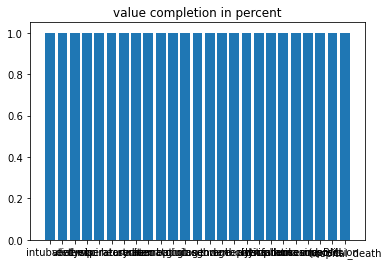

In [ ]:
relative_recorded_values = 1 - relative_missing_values
plt.bar(relative_recorded_values.index, relative_recorded_values)
plt.title("value completion in percent")
plt.show()

In [ ]:
my_df_sepsis_patients.shape

(19175, 25)

## exporting scaled dataframes

In [ ]:
# Write the DataFrame to CSV file.
with open('/content/drive/MyDrive/CHAIPH_PROJECT_GR2/project_submission_file_CHA_AIPH_Group1/data/final_dataframes/sepsis_patients/my_df_survival_preprocess.csv', 'w') as f:
  my_df_sepsis_patients.to_csv(f)